### **Introduction and Problem Statement**
- The goal is to predict the target variable based on the input features using a machine learning model. 
- To encode the categorical features like *'Gender'* and *'Geogarphy'* using either label encoding or one-hot encoding.
- To analyze features importance for finding out which feature influences the target variable the most.

### **Data Understanding and Description**
- The Dataset named Churn_Modelling is taken from kaggle for this task.
- The Dataset has 1000 rows and 14 features while Exited is the target variable indicating whether the customer has left the bank or not.
- This Dataset has no missing values so no need to handle missing values.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [ ]:
data=pd.read_csv('Churn_Modelling.csv') # Read the datset
print(data.head())
print(data.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [29]:
print("Missing Values: ",data.isnull().sum())

Missing Values:  RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Encoding Categorical Columns using label encoding
cols=["Gender","Geography"]
label_encoder=LabelEncoder()
for i in cols:
    data[i]=label_encoder.fit_transform(data[i])

In [32]:
X=data.drop("Exited",axis=1) # Target Column
X=X.drop(["CustomerId","Surname","RowNumber"],axis=1) # Un-necessary Columns
Y=data["Exited"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) # using Decision Tree Classifier with entropy as the criterion
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [40]:
y_pred = model.predict(X_test) # Predicted Values
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
con_mat=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", con_mat)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.854
Confusion Matrix:
 [[1539   68]
 [ 224  169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.43      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



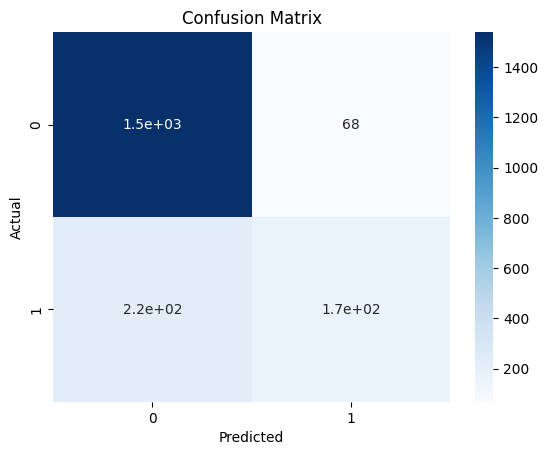

In [ ]:
sns.heatmap(con_mat,annot=True,cmap="Blues") # Heatmap of Confusion Matrix for seeing the difference between the actual values and the predicted values.
mp.xlabel("Predicted")
mp.ylabel("Actual")
mp.title("Confusion Matrix")
mp.show()

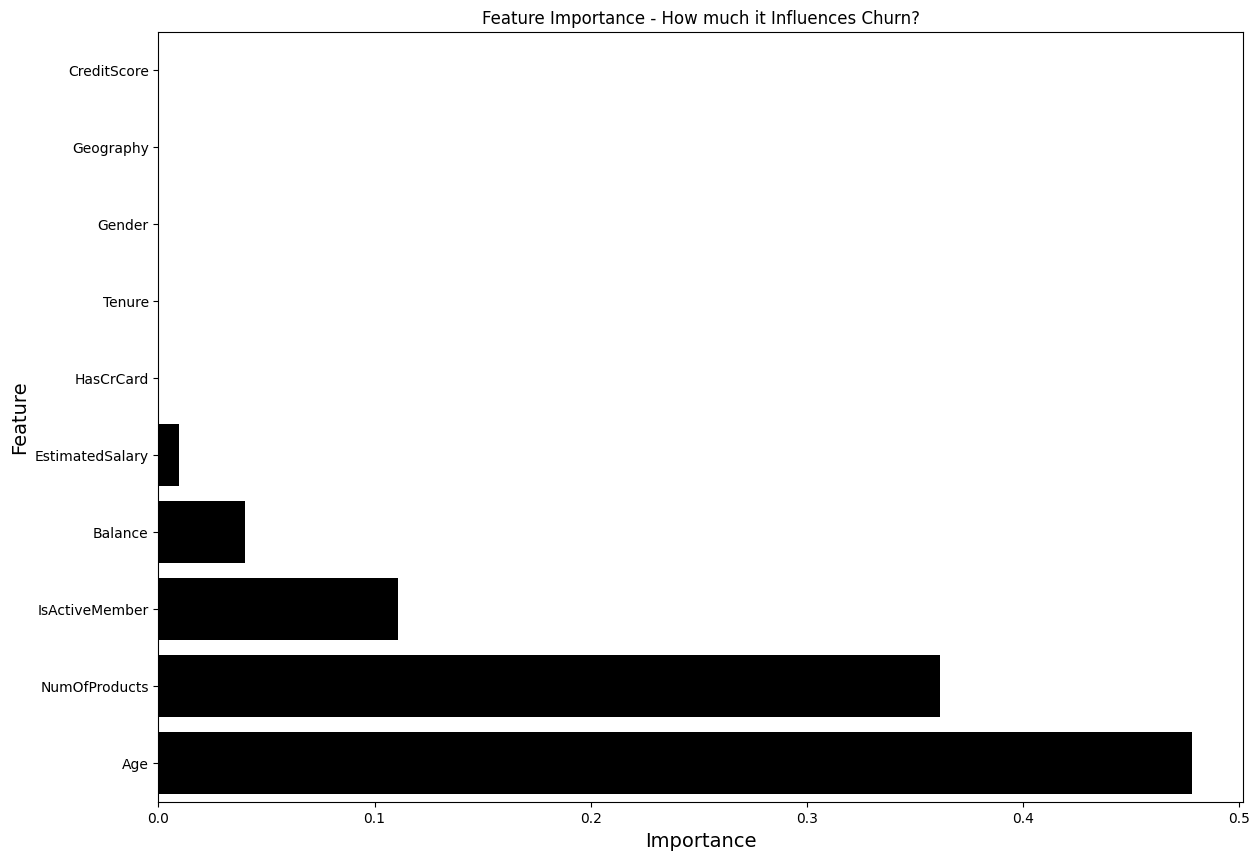

In [44]:
features=X.columns # Features
importances=model.feature_importances_ # get feature importances using the model
importance_features = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance')

mp.figure(figsize=(14,10))
sns.barplot(x='Importance', y='Feature', data=importance_features,color="black") # plot the features importances
mp.xlabel("Importance", fontsize=14)
mp.ylabel("Feature", fontsize=14)
mp.title("Feature Importance - How much it Influences Churn?")
mp.show()


### **Key Insights**
- The machine learning model used in this task is Decision Tree Classifier which is a classification model.
- Some of the faetures like CustomerId, Surname, RowNumber are not influencing the target variable so they are dropped from the model.
- Model's Accuracy to predict target variable is **0.854**(85%).
- The classification report is sowing model's Precision, Recall and F1 score for each class in the target variable.